In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
# Function to build a model with a given regularization
def build_model(regularizer=None):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizer),
        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizer),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Compile and train a model with a given regularization
def compile_and_train(regularizer, regularizer_name):
    model = build_model(regularizer)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                        validation_data=(x_test, y_test), verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"\n{regularizer_name} Regularization - Test accuracy: {test_acc:.4f}")
    return model

In [ ]:
# Plot histograms of the weights
def plot_weight_histograms(model, title):
    weights = np.concatenate([np.abs(w.flatten()) for w in model.get_weights()])
    plt.hist(weights, bins=50, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [ ]:
# Train and evaluate models with L2 regularization and without any regularization
print("Training with No Regularization...")
model_no_reg = compile_and_train(None, "No")

print("\nTraining with L2 Regularization...")
model_l2 = compile_and_train(regularizers.l2(0.001), "L2")

Training with No Regularization...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 - 9s - 19ms/step - accuracy: 0.9069 - loss: 0.3341 - val_accuracy: 0.9504 - val_loss: 0.1685
Epoch 2/10
469/469 - 2s - 4ms/step - accuracy: 0.9601 - loss: 0.1373 - val_accuracy: 0.9655 - val_loss: 0.1156
Epoch 3/10
469/469 - 3s - 6ms/step - accuracy: 0.9721 - loss: 0.0952 - val_accuracy: 0.9685 - val_loss: 0.1026
Epoch 4/10
469/469 - 3s - 5ms/step - accuracy: 0.9784 - loss: 0.0724 - val_accuracy: 0.9721 - val_loss: 0.0880
Epoch 5/10
469/469 - 4s - 7ms/step - accuracy: 0.9830 - loss: 0.0573 - val_accuracy: 0.9748 - val_loss: 0.0859
Epoch 6/10
469/469 - 4s - 8ms/step - accuracy: 0.9863 - loss: 0.0463 - val_accuracy: 0.9724 - val_loss: 0.0870
Epoch 7/10
469/469 - 3s - 5ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9745 - val_loss: 0.0842
Epoch 8/10
469/469 - 2s - 5ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.9773 - val_loss: 0.0762
Epoch 9/10
469/469 - 3s - 6ms/step - accuracy: 0.9926 - loss: 0.0248 - val_accuracy: 0.9741 - val_loss: 0.0860


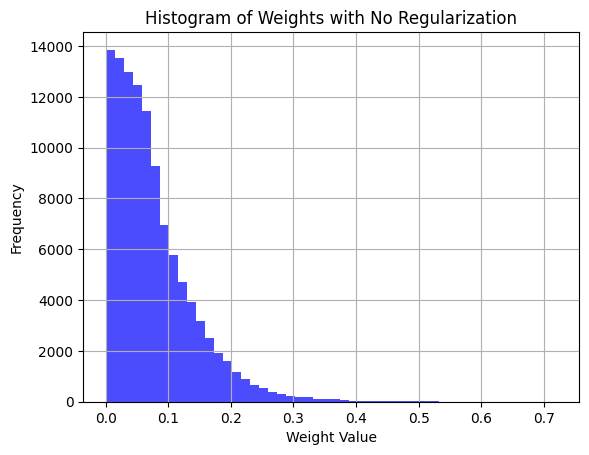

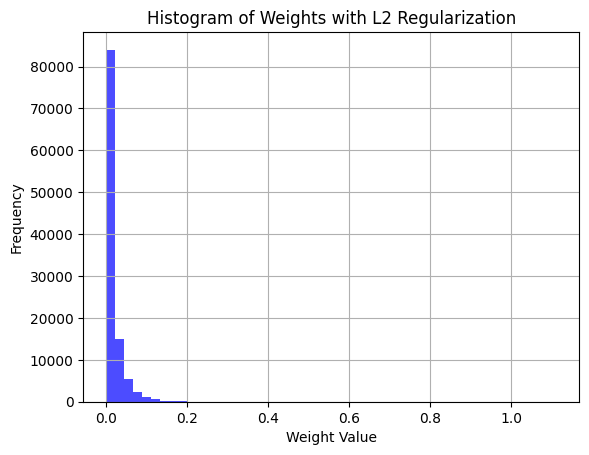

In [ ]:
# Plot the histograms of weights
plot_weight_histograms(model_no_reg, 'Histogram of Weights with No Regularization')
plot_weight_histograms(model_l2, 'Histogram of Weights with L2 Regularization')